# 비선형 모델인 신경망 소개
    - sortmax, 활성함수, 역전파 알고리즘 Study

## 알아두자
    - softmax 함수 사용 이유?
    - softmax 함수의 결과값을 분류 모델의 학습에 어떤식으로 사용할 수 있을지?

### 지난시간
- 선형적으로 학습는 방법에 대해 스터디
    - 단순한 데이터에서 가능
    - 분류 문제 또는 더 복잡해지면 쓰기 어려움

- 신경망
    - 비선형 모델 (선형 + 비선형)
    - 어떻게 비선형 만드나?

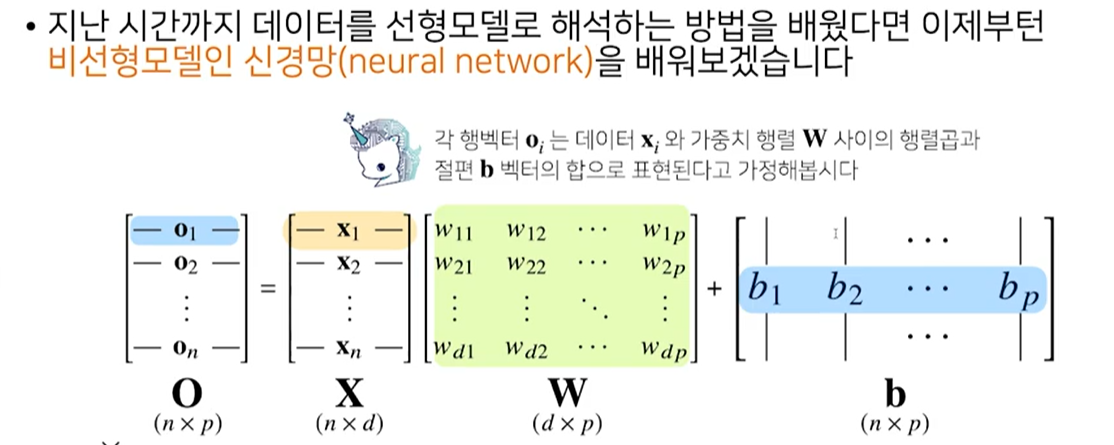

- X : Data  (d : d개의 변수)
- W : 가중치
- b : 절편
- O : 출력   (p : p개의 상대변수)

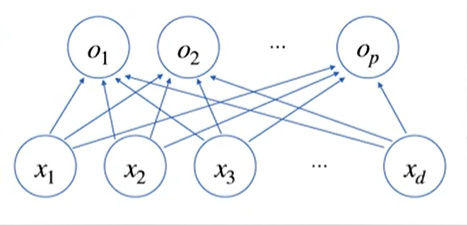

- 분류문제를 풀때 필요한 연산자?
    - softmax 연산
        - 모델의 출력을 확률로 해석할 수 있게 해주는 연산
        - 전체 합이 1이 되도록 출력을 만들어 줌
        - 지수함수로 계산함 아래 그림 참조
        - numpy max 함수 사용 이유는 exp 계산시 너무 큰값이 들어오면 오버 플로우 발생 가능하기 때문
            - Softmax를 구현할 때 overflow 가 자주 발생하는 문제로 새로운 softmax 함수인 new_softmax를 정의한다. 
            - 이는 원소에 어떠한 수를 더하여 exp를 취하더라도 결과 값이 같다는 softmax의 성질을 이용한 것
            - '원소들의 최댓값의 음수'로 한 것이다. 예를 들어 a = [1010,1000,990] a+c = [0,-10,-20] 이 된다
        - 분류문제를 잘 풀 수 있게 됨
    - one_hot 벡터
        - 학습시에는 softmax가 필요하지만
        - 추론시에는 one_hot만 써도 됨

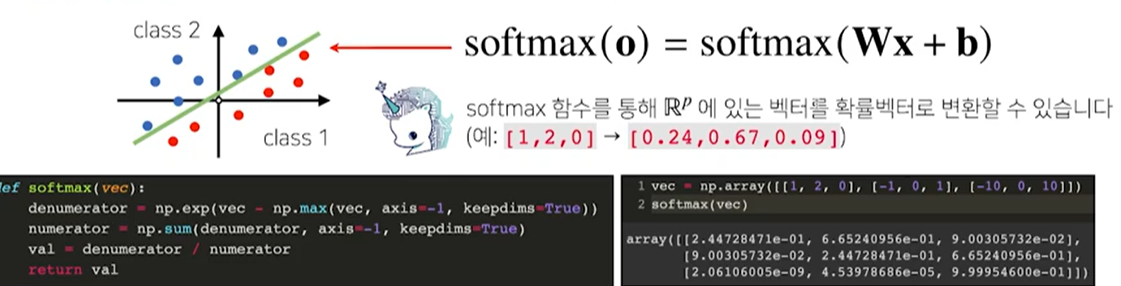

- 신경망은?
    - 선현모델과 활성함수(activation function)를 합성한 함수이다!
        - 퍼셉트론이라고도 함
    - 활성함수를 안쓰면 선형 모형과 차이가 없음

- 활성함수 종류?
    - 시그모이드, tanh, Relu (Relu가 지금은 가장 많이 사용됨)

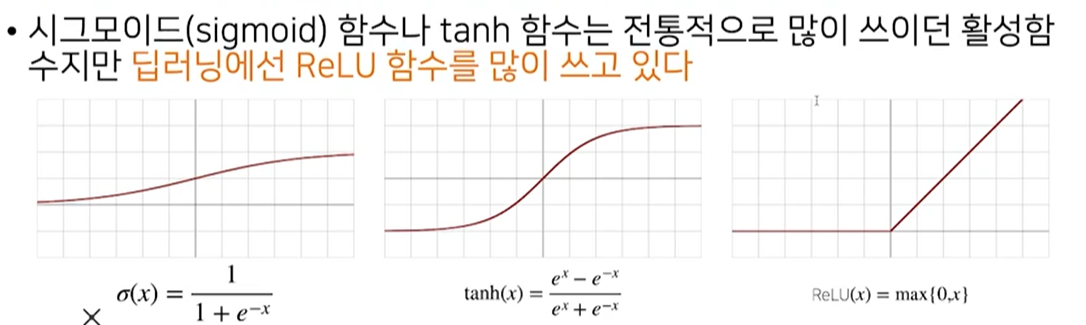

- Relu 는 선형함수로 보이는데??
    - 잘 보면 활성함수다! 잘 보길 바람

- 잠재벡터 H에서 한번더 W, b를 통해 선형 변환하면, 2층 신경망이 구성된다. (아래그림)
    - H와 z의 차이는, z를 활성함수인 시그마를 씌워서 H를 만든다.
        - 즉 시그모이드, tanh, Relu 중에서 한개를 적용함
- 계속 사용하면 다층 신경망이 구성된다 (퍼셉트론 MLP)

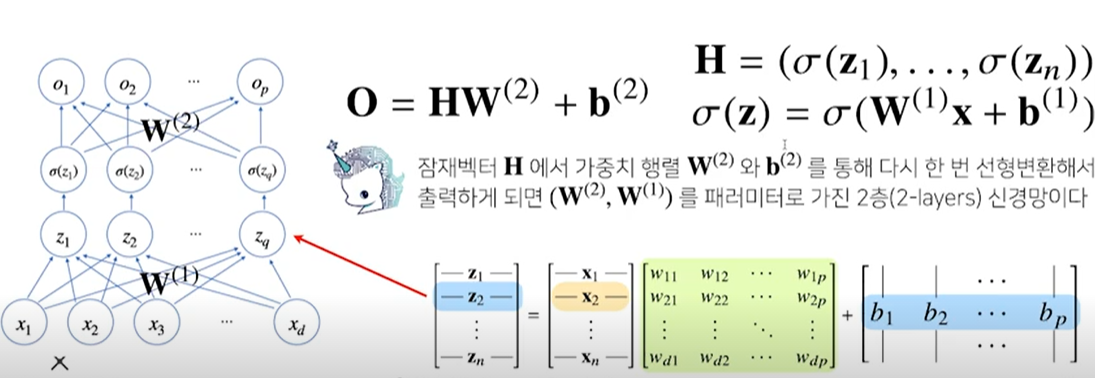

### 아래와 같이 지금까지 소개한 것은 순전파(forward propagation) 이다.

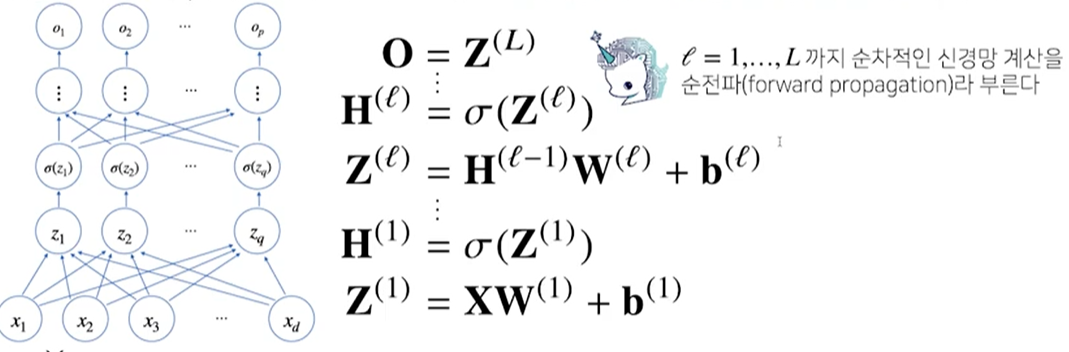

- 왜 여러층을 사용하나?
    - 사실 2층 신경망으로도 임의의 연속함수를 근사할 수 있음
    - 실제 학습할때는 무리가 있고, 여러층을 써야 효율적으로 학습이 가능함
        - 뉴런(노드) 숫자가 훨씬 빨리 줄어들기 때문에 효율적

### 지금부터 역전파(backpropagation) 알고리즘을 배우겠다

- 순전파와 차이?
    - 역전파는 경사하강법 적용할때 gradient vector 적용해야 경사하강법을 적용할 수 있음
    - 행렬들의 모든 원소의 갯수만큼 경사하강법을 적용하게되면 많은 경사하강법 필요
    - 선형은 한층만 고려하면 되서 가능하지만, 다층에서는 한번에 하기 어려움
    - 순차적으로 구하기 위함

- 손실함수 L에대한 미분을 구할때 역전파 알고리즘이 활용된다.
- 역전파 : 윗층의 그레디언트 벡터를 활용해서 아래층 그레디언트 벡터 계산함 (계속 아래로 전달)

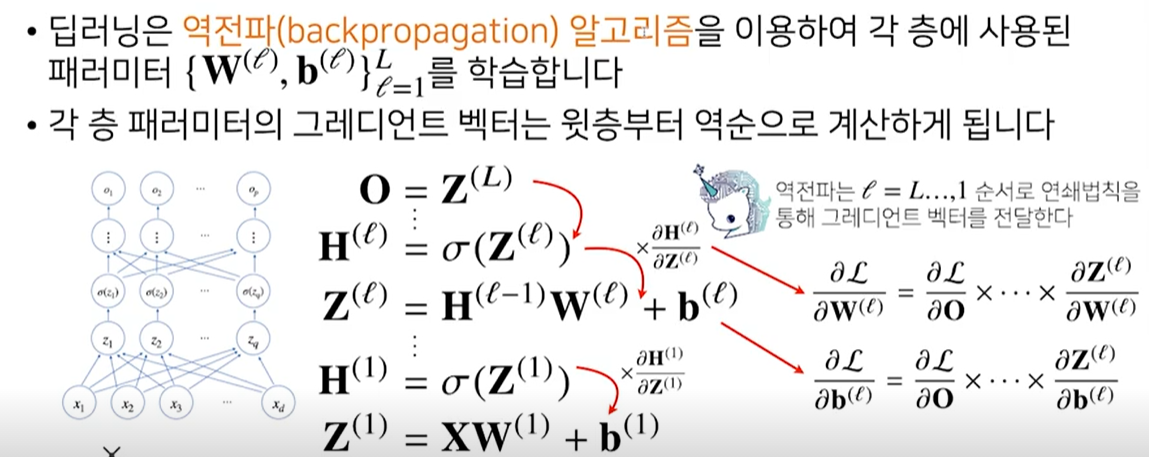

- 역전파 알고리즘은 어떤 미분법 사용하나?
    - 연쇄법칙 기반의 자동미분을 사용함

- 자동미분은 이번 강의에서 다루지 않음
# 연쇄법칙??
    - 아래 그림참조 (두 함수의 결합으로 표현)
    - 미분을 할때 합성합수의 미분을 활용

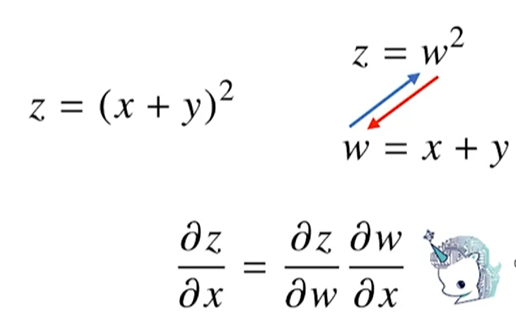

- 주의점 : 각각의 텐서값을 메모리에 저장해 두어야 역전파 알고리즘 사용가능 (forward는 저장안해도 됨)

- (예제) 2층 신경망에서 W1의 Loss func에 대한 손실함수를 계산해 보자
    - 경국 W2의 손실함수도 필요한데 아래의 수식을 참조해 보도록 하자

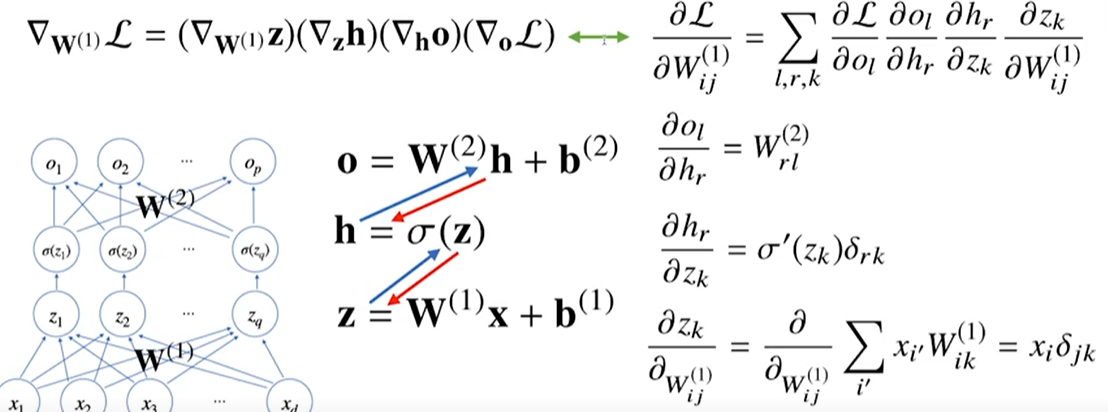